#Importing Libraries and Dataset


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

train_file_id = '1E3p144w71ZjxL4LyObABXxCj1lrK7atF'
train_file = 'Adult_TrainDataset.csv'
!gdown 'https://drive.google.com/uc?id={train_file_id}'

Downloading...
From: https://drive.google.com/uc?id=1E3p144w71ZjxL4LyObABXxCj1lrK7atF
To: /content/Adult_TrainDataset.csv
100% 3.55M/3.55M [00:00<00:00, 131MB/s]



<div dir=rtl>
برای استفاده از دیتا ست داده شده، آنها را در گوگل درایو آپلود کرده ایم. روشی که در کلاس تدریسیاری گفته شد( استفاده از دستورات
drive.mount('/content/drive') و file_path نوشته شده و به صورت کامنت قابل مشاهده هستند.

در این پروژه برای اینکه تمامی اعضا بتوانند به دیتاست دسترسی داشته باشند، از این روش استفاده کردیم که پس از آپلود فایل ها در درایو، آی دی فایل را بدست آورده ایم. برای مثال ای دی فایل شامل داده های ترین را در متغیر train_file_id ذخیره کرده ایم. سپس از دستور gdown  استفاده کرده ایم. این دستور فایل مورد نظر را دانلود می کند.
</div>

In [ ]:
test_file_id = '19UXLhQ05psPJE_vEiO2bzrqZH3qpUEtw'
test_file = 'Adult_TestDataset.csv'
!gdown 'https://drive.google.com/uc?id={test_file_id}'

Downloading...
From: https://drive.google.com/uc?id=19UXLhQ05psPJE_vEiO2bzrqZH3qpUEtw
To: /content/Adult_TestDataset.csv
100% 1.78M/1.78M [00:00<00:00, 153MB/s]


In [ ]:
#%pwd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#file_path = "/content/drive/MyDrive/Data/Adult_TrainDataset.csv"
#df = pd.read_csv(file_path)

In [ ]:
#test_file_path = "/content/drive/MyDrive/Data/Adult_TeseDataset.csv"
#test_df = pd.read_csv(test_file_path)

In [ ]:
df_train = pd.read_csv(train_file)
df_train.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<div dir=rtl>
از دستور read_csv استفاده کرده ایم و داده های ترین را در دیتافریمی به نام df_train ریخته ایم. با استفاده از دستور
.head() می توانیم 5 تا رکورد اول داده ها را مشاهده کنیم.همین کار را برای داده های تست انجام داده ایم.
</div>

In [ ]:
df_test = pd.read_csv(test_file)
df_test.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df_train.shape

(32561, 15)

<div dir=rtl>
با استفاده از دستور  shape تعداد سطر ها و ستون های داده ها را مشاهده می کنیم.
</div>


In [ ]:
df_test.shape

(16281, 15)

<div dir="rtl">
دو دیتاست
train
و
test
را برای انجام پیش پردازش ها ادغام میکنیم
و در مرحله آمورش مدل‌ها،
دوباره آنها را
split
میکنیم.
</div>

In [ ]:
# combining datasets for a precise EDA & data preprocessing
datasets = [df_train, df_test]
df = pd.concat(datasets)
df.shape

(48842, 15)

#Getting overall Statistics about the dataset
<div dir=rtl>
برای فهم بهتر دستاست، کار های زیر را انجام می دهیم:
</div>


In [ ]:
df.columns

Index(['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country',
       'Income'],
      dtype='object')

<div dir=rtl>
با استفاده از این دستور، ستون را مشاهده می کنیم. این ستون ها نشان دهنده ی ویژگی ها هستند.
</div>


In [ ]:
df.head(10)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<div dir=rtl>
همانطور که مشاهده میشه، با این دستور میتونیم 10 رکورد اول دیتاست رو مشاهده کنیم.
</div>


In [ ]:
df.dtypes

Age                  int64
Work_Class          object
Final_Weight         int64
Education           object
Education-Number     int64
Marital_Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_Gain         int64
Capital_Loss         int64
Hours-Per-Week       int64
Native_Country      object
Income              object
dtype: object


<div dir=rtl>
در اینجا نام و تایپ هر اتریبیوت رو مشاهده می کنیم. دیتاست داده شده از داده های عددی و غیر عددی تشکیل شده.

 در پیش پردازش داده ها باید داده های غیر عددی رو با روشی تبدیل به داده های عددی کنیم و از روشی برای نرمالسازی/استاندارد سازی داده های عددی استفاده کنیم. جلوتر هر دو این کار هارو انجام داده ایم.
</div>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               48842 non-null  int64 
 1   Work_Class        48842 non-null  object
 2   Final_Weight      48842 non-null  int64 
 3   Education         48842 non-null  object
 4   Education-Number  48842 non-null  int64 
 5   Marital_Status    48842 non-null  object
 6   Occupation        48842 non-null  object
 7   Relationship      48842 non-null  object
 8   Race              48842 non-null  object
 9   Sex               48842 non-null  object
 10  Capital_Gain      48842 non-null  int64 
 11  Capital_Loss      48842 non-null  int64 
 12  Hours-Per-Week    48842 non-null  int64 
 13  Native_Country    48842 non-null  object
 14  Income            48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df.describe().T #include='all'

,count,mean,std,min,25%,50%,75%,max
Age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
Final_Weight,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
Education-Number,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
Capital_Gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
Hours-Per-Week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


<div dir=rtl>
اطلاعات مربوط به داده های عددی رو مشاهده می کنیم.
</div>


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Work_Class,48842,9,Private,33906
Education,48842,16,HS-grad,15784
Marital_Status,48842,7,Married-civ-spouse,22379
Occupation,48842,15,Prof-specialty,6172
Relationship,48842,6,Husband,19716
Race,48842,5,White,41762
Sex,48842,2,Male,32650
Native_Country,48842,42,United-States,43832
Income,48842,2,<=50K,37155


<div dir=rtl>
اطلاعات مربوط به داده های غیر عددی رو مشاهده می کنیم.
</div>

In [ ]:
df.shape

(48842, 15)

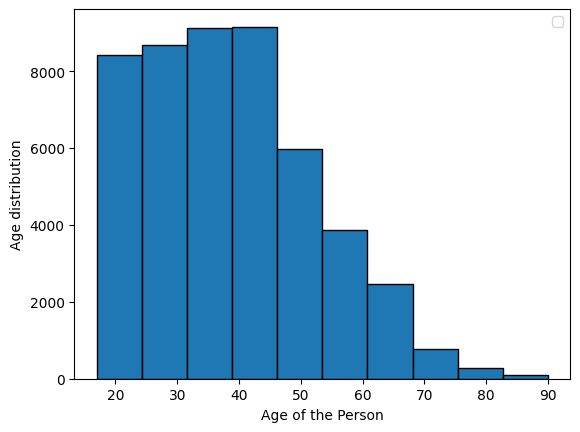

In [ ]:
plt.hist(x = df.Age.values, edgecolor='black')
plt.xlabel("Age of the Person")
plt.ylabel("Age distribution")
plt.legend()
plt.show()

<div dir=rtl>
با مشاهده این نمودار،درمیابیم که بیشتر افراد این دیتاست،در رنج سنی 20 تا40 سال هستند.
</div>

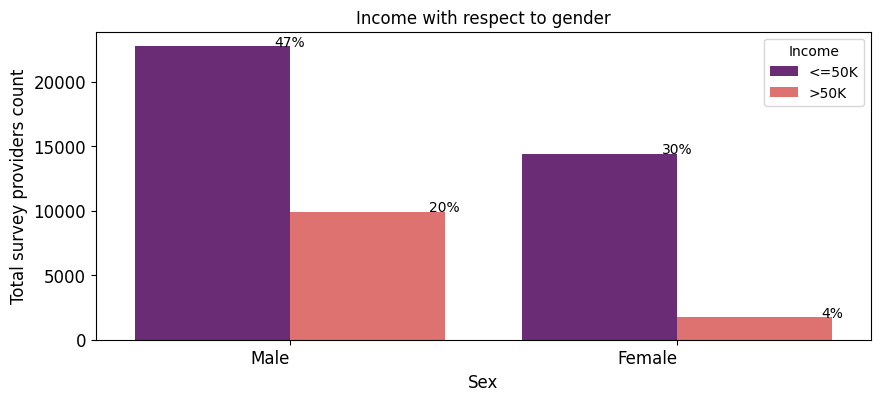

In [ ]:
plt.figure(figsize =(10,4))
ax = sns.countplot(data = df, x = 'Sex',hue = 'Income',palette='magma')
plt.xticks(size =12)
plt.xlabel('Sex', size = 12)
plt.yticks(size = 12)
plt.ylabel('Total survey providers count', size = 12)
plt.title("Income with respect to gender", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<div dir=rtl>
با مشاهده این نمودار درمیابیم که تنها حدود 24 درصد
افراد این دیتاست دارای درآمد بالای 50 هزار دلار هستند.

یعنی 20درصد این دیتاست متشکل از مردانی است که درامدشان بالای 50 هزار دلار دارند و فقط 4 درصد رکوردهای این دیتاست را زنان با درامد بیشتر از 50 هزار دلار تشکیل میدهند.
</div>

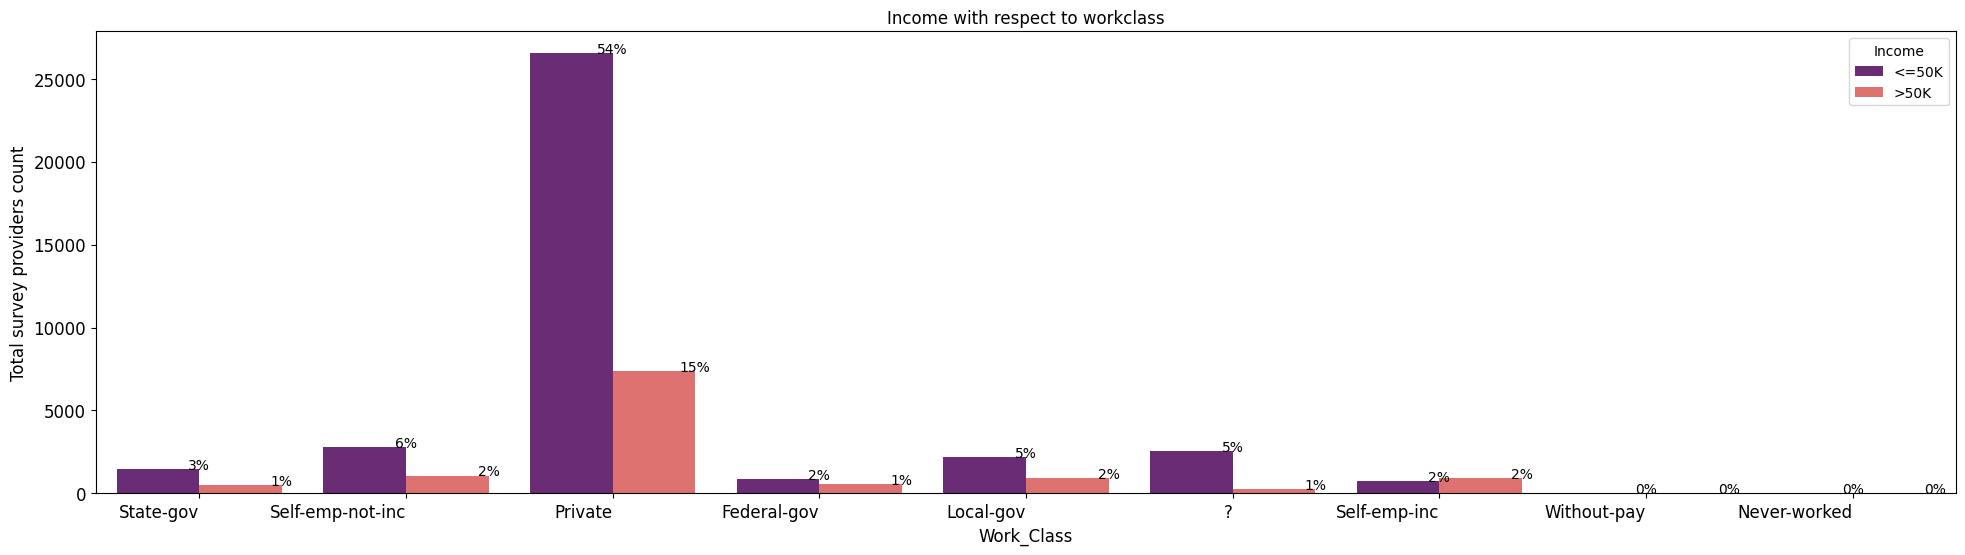

In [ ]:
plt.figure(figsize =(24,6))
ax = sns.countplot(data = df, x = 'Work_Class',hue = 'Income',palette='magma')
plt.xticks(size =12)
plt.xlabel('Work_Class', size = 12)
plt.yticks(size = 12)
plt.ylabel('Total survey providers count', size = 12)
plt.title("Income with respect to workclass", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<div dir=rtl>
بیش از 70 درصد افراد این دیتاست،دارای مشاغلی در کلاس
private
هستند.همچنین بیشتر افرادی که دارای درامد بالای 50 هزار دلار هستند(و همینطور بیشتر افرادی که دارای درامد کمترمساوی 50 هزاردلار هستند)
شغلشان در کلاس
private
قرار میگیرد.
</div>

#Dealing with missing values

In [ ]:
df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

<div dir=rtl>
از دستور بالا برای دست آوردن تعداد Null ها استفاده می کنیم.
همانطور که مشاهده می شود، در این دیتاست Null نداریم.

در این داده ها، مقادیر گم شده با Null نشان داده نشده اند و در عوض از ؟ استفاده شده. پس تعداد ؟ ها در هر ستون را می شماریم:
</div>



In [ ]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Work_Class
2799
5.73%


Occupation
2809
5.75%


Native_Country
857
1.75%






<div dir=rtl>
با توجه به اینکه تعداد مقادیر گم شده در دو دسته ی Work_Class  و Native_Country بسیار کم هستند پس این داده ها را حذف می کنیم.

می توانیم رکورد های دارای مقادیر گم شده در ستون Occupation را نیز حذف کنیم اما از روش دیگری استفاده می کنیم.
</div>




In [ ]:
df = df[df["Work_Class"] != "?"]
#df = df[df["occupation"] != "?"]
df = df[df["Native_Country"] != "?"]

In [ ]:
df['Occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
?                      10
Name: Occupation, dtype: int64

<div dir=rtl>
با استفاده از دستور value_counts، مقادیر مختلف در ستون occupation را مشاهده می کنیم. میبینیم که دسته ای به نام other_service وجود دارد. پس مقادیر ؟ را به دسته ی other اضافه می کنیم.
</div>


In [ ]:
df['Occupation'].replace(to_replace = ['?','Other-service'], value = 'Other', inplace = True)
df['Occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other                4818
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: Occupation, dtype: int64

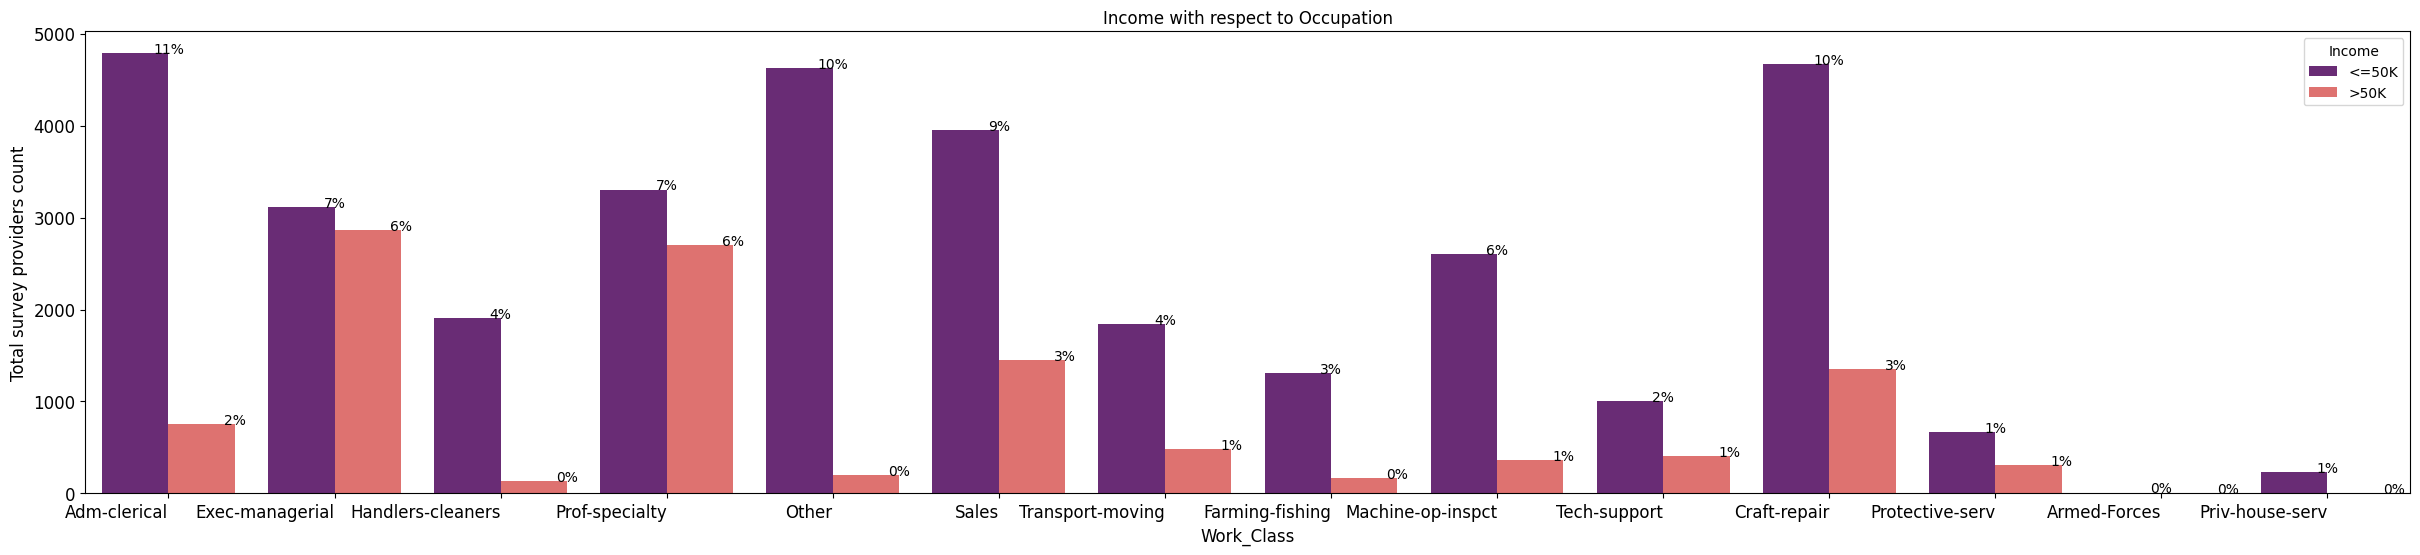

In [ ]:
plt.figure(figsize =(30,6))
ax = sns.countplot(data = df, x = 'Occupation',hue = 'Income',palette='magma')
plt.xticks(size =12)
plt.xlabel('Work_Class', size = 12)
plt.yticks(size = 12)
plt.ylabel('Total survey providers count', size = 12)
plt.title("Income with respect to Occupation", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<div dir=rtl>
بیشتر افرادی که  دارای درامد بالای 50 هزاردلار هستند دارای مشاغل
Prof-speciality
و
Exec-managerial
هستند.
و بیشتر افرادی که دارای درامد کمتر از 50 هزاردلار هستند دارای مشاغلی در زمینه های
Adm-clerical
،
craft-repair
و
other
هستند.
</div>

In [ ]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non >= 0:
        print (c)
        print (num_non)
        #print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Age
0


Work_Class
0


Final_Weight
0


Education
0


Education-Number
0


Marital_Status
0


Occupation
0


Relationship
0


Race
0


Sex
0


Capital_Gain
0


Capital_Loss
0


Hours-Per-Week
0


Native_Country
0


Income
0




<div dir=rtl>
می بینیم که دیگر مقدار گم شده ای در دیتاست وجود ندارد.
</div>


In [ ]:
print(f"After cleaning the dataset we get {df.shape[0]} rows and {df.shape[1]} columns in our detaset.")

After cleaning the dataset we get 45232 rows and 15 columns in our detaset.


#Dealing with duplicate values



<div dir=rtl>
در ادامه ی پیش پردازش داده ها، داده های تکراری را برسی میکنیم. قصد داریم تعداد داده های تکراری را بدست آوریم و آنها را از دیتاست حذف کنیم.
</div>


In [ ]:
df[df.duplicated()]

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [ ]:
print(f"There are {df.duplicated().sum()} duplicated values present.")

There are 47 duplicated values present.


In [ ]:
df.drop_duplicates(inplace = True)

<div dir=rtl>
داده های تکراری را حذف می کنیم.
</div>


In [ ]:
print(f"After deleting the duplicates we get {df.shape[0]} rows and {df.shape[1]} columns in our detaset.")

After deleting the duplicates we get 45185 rows and 15 columns in our detaset.


#exploreing all the columns of dataset.

در این مرحله، اطلاعات مربوط به هر ستون را برسی می کنیم.

In [ ]:
df.columns

Index(['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country',
       'Income'],
      dtype='object')

**Age**

In [ ]:
df["Age"].describe()

count    45185.000000
mean        38.552042
std         13.216920
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64


<div dir=rtl>
این ستون حاوی مقادیر عددی است. در ادامه تمام داده های عددی را استاندارد سازی کرده ایم.
</div>


**Final_Weight**

In [ ]:
df.Final_Weight.describe()

count    4.518500e+04
mean     1.897444e+05
std      1.056502e+05
min      1.349200e+04
25%      1.174000e+05
50%      1.783120e+05
75%      2.379030e+05
max      1.490400e+06
Name: Final_Weight, dtype: float64

In [ ]:
df.Final_Weight.value_counts()

203488    21
125892    18
120277    18
126569    17
113364    17
          ..
49837      1
345363     1
162856     1
278938     1
350977     1
Name: Final_Weight, Length: 26745, dtype: int64


<div dir=rtl>
این ستون به مسئله بی ربط است. آن را حذف می کنیم.
</div>


In [ ]:
df = df.drop('Final_Weight', axis=1)
df.head()

,Age,Work_Class,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(45185, 14)

**Education**

In [ ]:
df.Education.value_counts()

HS-grad         14772
Some-college     9889
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1622
Assoc-acdm       1507
10th             1225
7th-8th           823
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: Education, dtype: int64

**Education-Number**

In [ ]:
df['Education-Number'].value_counts()

9     14772
10     9889
13     7559
14     2513
11     1958
7      1622
12     1507
6      1225
4       823
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: Education-Number, dtype: int64


<div dir=rtl>
همانطور که مشاهده می کنیم دو ستون
Education  و Education-Number
 یک ویژگی رو نشان می دهند با این تفاوت که یکی تایپ عددی دارد و دیگری اسمی. به صورت زیر
 corrolation
 این دو رو برسی می کنیم.
</div>





In [ ]:
df.groupby('Education')['Education-Number'].unique().sort_values()

Education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: Education-Number, dtype: object


<div dir=rtl>
پس چون این دو ستون معادلند، ستون
Education-Number
رو حذف می کنیم.
</div>


In [ ]:
df = df.drop('Education', axis=1)

df_test = df_test.drop('Education',axis=1)

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Marital_Status**


In [ ]:
df['Marital_Status'].value_counts()

Married-civ-spouse       21043
Never-married            14574
Divorced                  6295
Separated                 1411
Widowed                   1277
Married-spouse-absent      553
Married-AF-spouse           32
Name: Marital_Status, dtype: int64


<div dir=rtl>
اطلاعات درباره این اتریبیوت بسیار پر جزئیات هستند و برای آموزش مدل نیازی به این اطلاعات زیاد نداریم. به صورت زیر این اتریبیوت رو تغییر می دهیم.
</div>



In [ ]:
df.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

df_test.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)


<div dir=rtl>

با توجه به اینکه اینجا متغیر اسمی داریم، باید برای آموزش مدل آنها را به عددی تبدیل کنیم.
دو روش برای اینکار داریم.

1.Label Encoding


> در این روش، به ترتیب الفبا هر مقدار جدید در بین داده هایمان به یک عدد نسبت داده می شود.



2.One-Hot Encoding


> در این روش، به ازای هر مقدار یونیک در بین داده ها، یک ویژگی به ستون های داده مان اضافه می شود و مقدار 0 و 1 را اختیار می کند.

مشکل روش 1 این است که به داده ها ترتیب می دهد و اگر داده ها ترتیبی نباشند، ممکن است باعث فهم اشتباه ما شوند.
از طرفی مشکل روش 2 این است که به ازای هر مقدار یونیک، یک ستون جدید به داده ها اضافه می کند و اگر تعداد مقادیر متنوع باشد، باعث ایجاد تعداد زیادی ستون می شود.

بر اساس ترتیبی بودن یا نبودن ویژگی و تعداد مقادیری که داده ها اخذ می کنند، تصمیم میگیریم که از کدام استفاده کنیم.

</div>





<div dir=rtl>
در ستون
Marital_Status
از روش
One-Hot Encoding
استفاده می کنیم چون داده ها تنها 2 مقدار متفاوت میگیرند و این ویژگی ترتیبی نیست.
</div>


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

#encoded_df = pd.DataFrame(encoder.fit_transform(df[['Marital_Status']]).toarray())

# Perform one-hot encoding on the 'Marital_Status' column and drop the original column
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital_Status', prefix_sep='_')
df.columns = [col + '_encoded' if col.startswith('Marital_Status_') else col for col in df.columns]



<div dir=rtl>
با استفاده از دستورات بالا، روش one hot encoding  را اجرا کرده ایم. این کد ستون اصلی را حذف می کند و دو ستون جدید به جدول اضافه می کند.
تز دستور get_dummies برای نامگذاری بهتر ستون های جدول استفاده کرده ا

 جدول با دستور زیر قابل مشاهده است.

</div>



In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


**Occupation**


In [ ]:
print(df.Occupation.unique(), df.Occupation.nunique())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other' 'Sales' 'Transport-moving' 'Farming-fishing' 'Machine-op-inspct'
 'Tech-support' 'Craft-repair' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv'] 14



<div dir=rtl>
با توجه به اینکه این ستون ویژگی اسمی است پس باید به عددی تبدیلش کنیم.

از طرفی چون تعداد مقادیر متفاوتش 14 تا می باشد پس اگر از
one hoe encoding
استفاده کنیم، تعداد ستون های زیادی اضافه می شود پس از روش
Label encoding
استفاده می کنیم.
</div>


In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on '[Occupation]' column
df['Occupation'] = lab.fit_transform(df['Occupation'])

<div dir=rtl>
در کد بالا روش label encoding را اجرا کرده ایم. ستون قبلی با ستون داده های عددی جایگزین شده است.
</div>


In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded
0,39,State-gov,13,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,13,3,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,9,5,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,7,5,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,13,9,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


**Relationship**


In [ ]:
df.Relationship.value_counts()

Husband           18653
Not-in-family     11680
Own-child          6623
Unmarried          4787
Wife               2092
Other-relative     1350
Name: Relationship, dtype: int64

In [ ]:
df.Relationship.nunique()

6

<div dir=rtl>
با استفاده از دستور بالا تعداد مقادیر یونیک در ستون را پیدا کرده ایم.

با توجه به اینکه تعداد ویژگی های منحصر به فرد 6 است، که عدد بزرگی نیست، می توانیم برای جلوگیری از ایجاد بایاس و مشکلات ناشی از
Label encoding
از
one hot encoding
استفاده کنیم.
</div>


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

df = pd.get_dummies(df, columns=['Relationship'], prefix='Relationship', prefix_sep='_')
df.columns = [col + '_encoded' if col.startswith('Relationship_') else col for col in df.columns]

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded,Relationship_Husband_encoded,Relationship_Not-in-family_encoded,Relationship_Other-relative_encoded,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded
0,39,State-gov,13,0,White,Male,2174,0,40,United-States,<=50K,0,1,0,1,0,0,0,0
1,50,Self-emp-not-inc,13,3,White,Male,0,0,13,United-States,<=50K,1,0,1,0,0,0,0,0
2,38,Private,9,5,White,Male,0,0,40,United-States,<=50K,0,1,0,1,0,0,0,0
3,53,Private,7,5,Black,Male,0,0,40,United-States,<=50K,1,0,1,0,0,0,0,0
4,28,Private,13,9,Black,Female,0,0,40,Cuba,<=50K,1,0,0,0,0,0,0,1


**Race**

In [ ]:
df.Race.value_counts()

White                 38866
Black                  4230
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: Race, dtype: int64

In [ ]:
df.Race.nunique()

5



<div dir=rtl>
مشابه ستون قبل، از
one hot encoder
استفاده می کنیم.
</div>

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

df = pd.get_dummies(df, columns=['Race'], prefix='Race', prefix_sep='_')
df.columns = [col + '_encoded' if col.startswith('Race_') else col for col in df.columns]

In [ ]:
df.tail()

,Age,Work_Class,Education-Number,Occupation,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,...,Relationship_Not-in-family_encoded,Relationship_Other-relative_encoded,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded
16275,33,Private,13,9,Male,0,0,40,United-States,<=50K,...,0,0,1,0,0,0,0,0,0,1
16276,39,Private,13,9,Female,0,0,36,United-States,<=50K,...,1,0,0,0,0,0,0,0,0,1
16278,38,Private,13,9,Male,0,0,50,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,1
16279,44,Private,13,0,Male,5455,0,40,United-States,<=50K,...,0,0,1,0,0,0,1,0,0,0
16280,35,Self-emp-inc,13,3,Male,0,0,60,United-States,>50K,...,0,0,0,0,0,0,0,0,0,1


<div dir=rtl>

با استفاده از این دستور 5 رکورد انتهایی دیتاست را مشاهده می کنیم.
</div>


**Sex**

In [ ]:
print(df.Sex.unique(), df.Sex.nunique())

['Male' 'Female'] 2



<div dir=rtl>
مشابه استدلال های گذشته،
از
one hot encoder
استفاده می کنیم.
</div>


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', prefix_sep='_')
df.columns = [col + '_encoded' if col.startswith('Sex_') else col for col in df.columns]

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,...,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded,Sex_Female_encoded,Sex_Male_encoded
0,39,State-gov,13,0,2174,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,13,3,0,0,13,United-States,<=50K,1,...,0,0,0,0,0,0,0,1,0,1
2,38,Private,9,5,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
3,53,Private,7,5,0,0,40,United-States,<=50K,1,...,0,0,0,0,0,1,0,0,0,1
4,28,Private,13,9,0,0,40,Cuba,<=50K,1,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.shape

(45185, 24)

**Capital_Gain, Capital_Loss**


In [ ]:
df[['Capital_Gain','Capital_Loss']].describe()

,Capital_Gain,Capital_Loss
count,45185.000000,45185.000000
mean,1102.332256,88.667965
std,7509.436666,405.113923
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000




<div dir=rtl>
75 درصد از داده های این دو ستون 0 هستند پس این دو ستون را حذف می کنیم.

</div>


In [ ]:
df.drop(['Capital_Gain','Capital_Loss'], axis =1, inplace = True)

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded,Relationship_Husband_encoded,...,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded,Sex_Female_encoded,Sex_Male_encoded
0,39,State-gov,13,0,40,United-States,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,13,3,13,United-States,<=50K,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,Private,9,5,40,United-States,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,Private,7,5,40,United-States,<=50K,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,Private,13,9,40,Cuba,<=50K,1,0,0,...,0,0,1,0,0,1,0,0,1,0


**Hours-Per-Week**


In [ ]:
df['Hours-Per-Week'].value_counts()

40    21335
50     4091
45     2600
60     2085
35     1776
      ...  
82        1
94        1
87        1
79        1
69        1
Name: Hours-Per-Week, Length: 96, dtype: int64

**Native_Country**


In [ ]:
df['Native_Country'].unique(), df['Native_Country'].nunique()

(array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
        'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
        'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
        'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
        'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
        'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
        'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
        'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
        'Holand-Netherlands'], dtype=object),
 41)

In [ ]:
df['Native_Country'].value_counts()

United-States                 41266
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     


<div dir=rtl>
با توجه به اینکه تعداد مقدار های متفاوت 41 است، از
Label encoding
استفاده می کنیم.

</div>



In [ ]:
lab = LabelEncoder()

df['Native_Country'] = lab.fit_transform(df['Native_Country'])

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded,Relationship_Husband_encoded,...,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded,Sex_Female_encoded,Sex_Male_encoded
0,39,State-gov,13,0,40,38,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,13,3,13,38,<=50K,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,Private,9,5,40,38,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,Private,7,5,40,38,<=50K,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,Private,13,9,40,4,<=50K,1,0,0,...,0,0,1,0,0,1,0,0,1,0


**Income**



<div dir=rtl>
ستون درآمد را نیز باید به داده های عددی تبدیل کنیم.
این کار را به این صورت انجام می دهیم که درآمد های بالای 50 هزار را متناظر با عدد 1 و درآمد های زیر 50 هزار را متناظر با 0 درنظر می گیریم.

</div>


In [ ]:
df['Income'].replace({'<=50K':0,'>50K':1},inplace=True)

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded,Relationship_Husband_encoded,...,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded,Sex_Female_encoded,Sex_Male_encoded
0,39,State-gov,13,0,40,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,13,3,13,38,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,Private,9,5,40,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,Private,7,5,40,38,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,Private,13,9,40,4,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


**Work_Class**

In [ ]:
df.Work_Class.value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Never-worked           10
Name: Work_Class, dtype: int64


<div dir=rtl>
این ستون را هم با استفاده از Label encoding
به داده های عددی تبدیل می کنیم.
</div>

In [ ]:
#Encoding for "workclass" column

lab = LabelEncoder()

df['Work_Class'] = lab.fit_transform(df['Work_Class'])

#Standardization on numerical data


<div dir=rtl>
همانطور که اشاره شد، از استاندارد سازی روی داده ها استفاده کرده ایم.
برای استاندارد سازی از تابع StandardScaler استفاده می کنیم.

این تابع هر داده را با داده ی استاندارد شده(داده منهای میانگین تقسیم بر انحراف معیار) جایگزیم می کند.
</div>

In [ ]:
scaler = StandardScaler()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


<div dir=rtl>
ستون هایی که تایپ عددی دارند را بدست می آوریم.
</div>

In [ ]:
numerical_columns

Index(['Age', 'Work_Class', 'Education-Number', 'Occupation', 'Hours-Per-Week',
       'Native_Country', 'Income'],
      dtype='object')

In [ ]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

<div dir=rtl>
از دستور بالا برای استاندارد سازی استفاده شده است.
</div>

In [ ]:
df.head()

,Age,Work_Class,Education-Number,Occupation,Hours-Per-Week,Native_Country,Income,Marital_Status_married_encoded,Marital_Status_not married_encoded,Relationship_Husband_encoded,...,Relationship_Own-child_encoded,Relationship_Unmarried_encoded,Relationship_Wife_encoded,Race_Amer-Indian-Eskimo_encoded,Race_Asian-Pac-Islander_encoded,Race_Black_encoded,Race_Other_encoded,Race_White_encoded,Sex_Female_encoded,Sex_Male_encoded
0,0.033893,2.528567,1.129077,-1.482878,-0.078262,0.262691,-0.574139,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0.866169,1.655244,1.129077,-0.737795,-2.326571,0.262691,-0.574139,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,-0.041768,-0.091401,-0.438397,-0.241073,-0.078262,0.262691,-0.574139,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1.093153,-0.091401,-1.222134,-0.241073,-0.078262,0.262691,-0.574139,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,-0.798383,-0.091401,1.129077,0.752372,-0.078262,-5.331257,-0.574139,1,0,0,...,0,0,1,0,0,1,0,0,1,0


# Models
**Desicion tree**

In [ ]:
from sklearn import tree
from sklearn import preprocessing

train = df[:32561]
test = df[32562:]

X_train = train.drop('Income',axis=1)
y_train = train['Income'].values

X_test = test.drop('Income',axis=1)
y_test = test['Income'].values

label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

<div dir=rtl>
ابتدا جداسازی داده های ترین و تست را انجام می‌دهیم
(در ابتدای نوت بوک برای انجام بهتر
preprocessing
دو دیتاست را کانکت کردیم).
سپس برای هرکدام از دیتاست های ترین و تست،
دیتاست های X
و
y
را مشخص میکنیم.
در ادامه روی هر دو مجموعه داده
y
و
y_test
،
lable encoding
را انجام میدهیم
(برای امورش دادن و تست کردن عملکرد مدل،نیاز به دیتاهای عددی داریم).

سپس از مدل درخت تصمیم کتابخانه
sklearn
استفاده کرده و آن را روی مجموعه داده ترین،آموزش میدهیم.
</div>

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

<div dir="rtl">
در اینجا با استفاده از مدل
kNN
کتابخانه
sklearn
و دیتاست های
X_train
و
y_train
مدل را آمورش دادیم.
</div>

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf = model.fit(X_train, y_train)
pred = clf.predict(X_test)

print("AUC score data: ", roc_auc_score(y_test, pred))

AUC score data:  0.7106339381195905


<div dir="rtl">
در اینجا نیز با استفاده از مدل
SVC
کتابخانه
sklearn
،مدل را روی مجموعه داده های
X_train
و
y_train
آموزش میدهیم.
سپس مدل پیشبینی را با استفاده از دیتاست
X_test
انجام میدهد و در آخر،
AUC score
را با استفاده از
معیارهای ارزیابی
کتابخانه
sklearn
به دست می‌آوریم.
</div>

**performance measurement**

claculate confusion matrix




<div dir=rtl>

در این بخش ماتریس درهم‌ریختگی را با استفاده از کتابخانه sklearn  برای هر سه مدل knn, svm , decision tree با استفاده از prediction ها و تست محاسبه می‌کنیم.

</div>



In [ ]:
from sklearn.metrics import confusion_matrix


# Train the classifiers and make predictions
classifiers = [knn , clf, dtc]
predictions = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions.append(y_pred)

# Calculate confusion matrices
confusion_matrices = [confusion_matrix(y_test, y_pred) for y_pred in predictions]

# Print confusion matrices
classifier_names = ['KNN', 'SVM', 'Decision Tree']
for name, cm in zip(classifier_names, confusion_matrices):
    print(f'{name} Confusion Matrix:\n{cm}\n')

KNN Confusion Matrix:
[[8429 1103]
 [1333 1758]]

SVM Confusion Matrix:
[[8891  641]
 [1581 1510]]

Decision Tree Confusion Matrix:
[[8225 1307]
 [1464 1627]]





<div dir=rtl>

TP: تعداد نمونه هاي با برچسب مثبت که به درستی تشخیص داده شده اند.
TN: تعداد نمونه هاي با برچسب منفی که به درستی تشخیص داده شده اند.
FP: تعداد نمونه هاي با برچسب منفی که به اشتباه مثبت تشخیص داده شده اند.
FN: تعداد نمونه هاي با برچسب مثبت که به اشتباه منفی تشخیص داده شده اند.



در اینجا با توجه به خروجی confusion matrix داریم:


*   برای KNN:


> TP = 8429 , FP = 1103 , FN = 1333 , TN = 1758



*   برای SVM:


> TP = 8891 , FP = 641 , FN = 1581, TN = 1510


*    برای درخت تصمیم:


> TP = 8225 , FP = 1307 , FN = 1464, TN = 1627


با توجه به این اعداد، تعداد داده های مثبتی که مدل SVM درست پیش بینی کرده بیشتر  از 2 مدل دیگر می باشد. برای معیار TP رتبه بندی زیر را داریم:

SVM > KNN > DT










</div>



<div dir=rtl>

برای تحلیل مدل می توانیم از ماتریس آشفتگی یا معیار های زیر استفاده کنیم

1. دقت (accuracy): نسبت تعداد پیش‌بینی‌های صحیح به کل تعداد پیش‌بینی‌ها
2. دقت پیش‌بینی (صحت)(precision): نسبت تعداد پیش‌بینی‌های مثبت صحیح به کل تعداد  پیش بینی های مثبت
3. بازخوانی (recall): نسبت تعداد پیش‌بینی‌های مثبت صحیح به کل تعداد موارد مثبت واقعی
4. امتیاز F1 (F1-score): میانگین هارمونیک دقت پیش‌بینی و بازخوانی

از ماتریس آشفتگی میتوان برای محاسبه این معیار ها استفاده کرد. برای مثال داریم :

accuracy = (TP+TN) / (TP + TN + FP + FN)
درنتیجه دقت برای SVM برابر با عبارت زیر می شود:

accuracy = 8891+1510 / 8891+1581+641+1581 = 0.82

 البته در ادامه از دستورات کتابخانه ها استفاده کرده ایم تا این معیار ها را به  محاسبه کنیم.

</div>


**visualize confusion matrix**



<div dir=rtl>

با استفاده از کتابخانه‌های seaborn , matplotlib  ماتریس آشفتگی را رسم می‌کنیم.

</div>


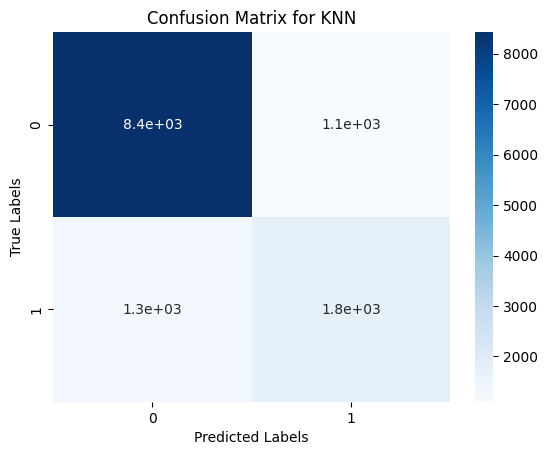

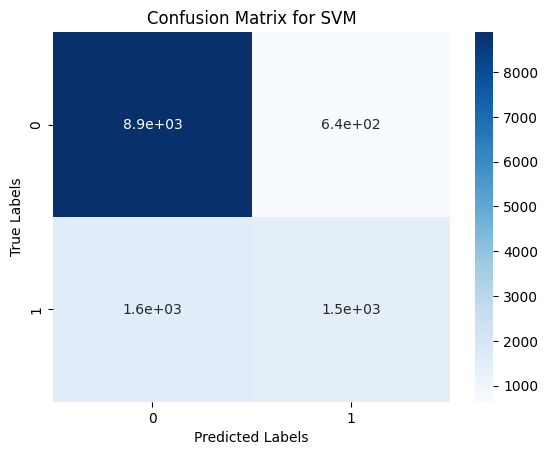

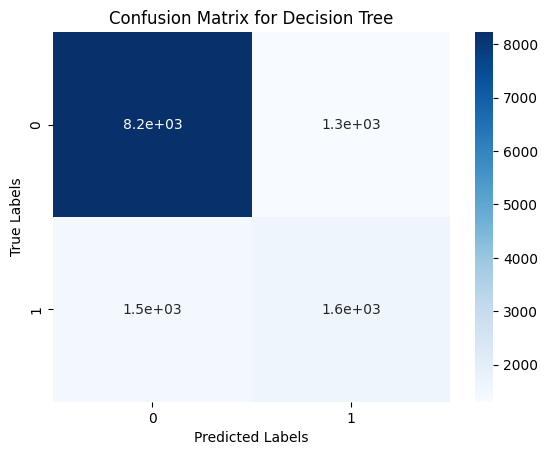

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot confusion matrix for SVM
for name, cm in zip(classifier_names, confusion_matrices):
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix for {}'.format(name))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()





classification report( F1-score, precision, recall and accuracy)



<div dir=rtl>

با استفاده از classification report از کتابخانه sklearn  معبارهای ارزیابی مانند f1-score, precision , recall را برای هر سه مدل svm , knn , decision tree رسم می‌کنیم.


</div>


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification_report
classification_reports = [classification_report(y_test, y_pred) for y_pred in predictions]

for name, clr in zip(classifier_names,classification_reports ):
    print(f'{name} classification_reports:\n{clr}\n')

KNN classification_reports:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9532
           1       0.61      0.57      0.59      3091

    accuracy                           0.81     12623
   macro avg       0.74      0.73      0.73     12623
weighted avg       0.80      0.81      0.80     12623


SVM classification_reports:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9532
           1       0.70      0.49      0.58      3091

    accuracy                           0.82     12623
   macro avg       0.78      0.71      0.73     12623
weighted avg       0.81      0.82      0.81     12623


Decision Tree classification_reports:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      9532
           1       0.55      0.53      0.54      3091

    accuracy                           0.78     12623
   macro avg       0.70      0.6

calculate ROC and AUC

In [ ]:
from sklearn import metrics
# Calculate ROC curve and AUC for each classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, (name, y_pred) in enumerate(zip(classifier_names, predictions)):
    fpr[name], tpr[name], _ = metrics.roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc[name] = metrics.auc(fpr[name], tpr[name])


visualize ROC and AUC

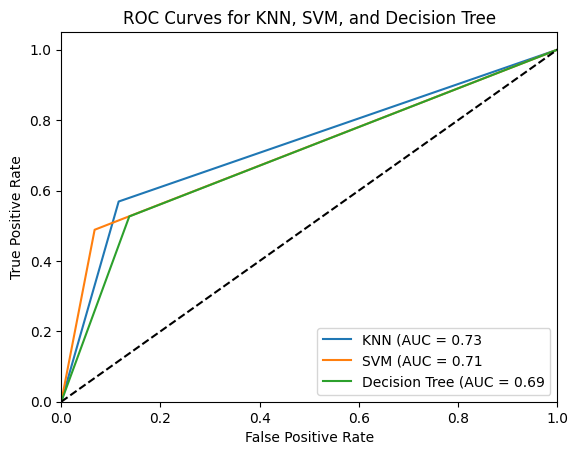

In [ ]:
# Plot ROC curves
plt.figure()
for name in classifier_names:
    plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN, SVM, and Decision Tree')
plt.legend(loc="lower right")
plt.show()



<div dir=rtl>

بر اساس این معیارها، می‌توانیم ببینیم که مدل SVM دقت و دقت پیش‌بینی بالاتری دارد، اما بازخوانی پایین‌تری دارد. مدل KNN بازخوانی بالاتری دارد، اما دقت پیش‌بینی پایین‌تری دارد. مدل درخت تصمیم دقت، دقت پیش‌بینی و بازخوانی پایین‌تری دارد. بنابراین، مدل KNN میتواند بهترین گزینه برای این مسئله باشد، اما این بستگی به نیازها و محدودیت‌های خاص مسئله دارد.

</div>


In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div dir="rtl">
با استفاده از این تابع،
معیارهای
precision,recall,accuracy
و
f1 score
را برای هر مدل،به صورت یک دیکشنری برمیگردانیم.
برای بدست آوردن این معیارها از توابع آماده کتابخانه
sklearn
استفاده شده است.
</div>

In [ ]:
dtc_eval = evaluate_model(dtc,X_test, y_test)
knn_eval = evaluate_model(knn, X_test, y_test)
svc_eval = evaluate_model(clf,X_test, y_test)

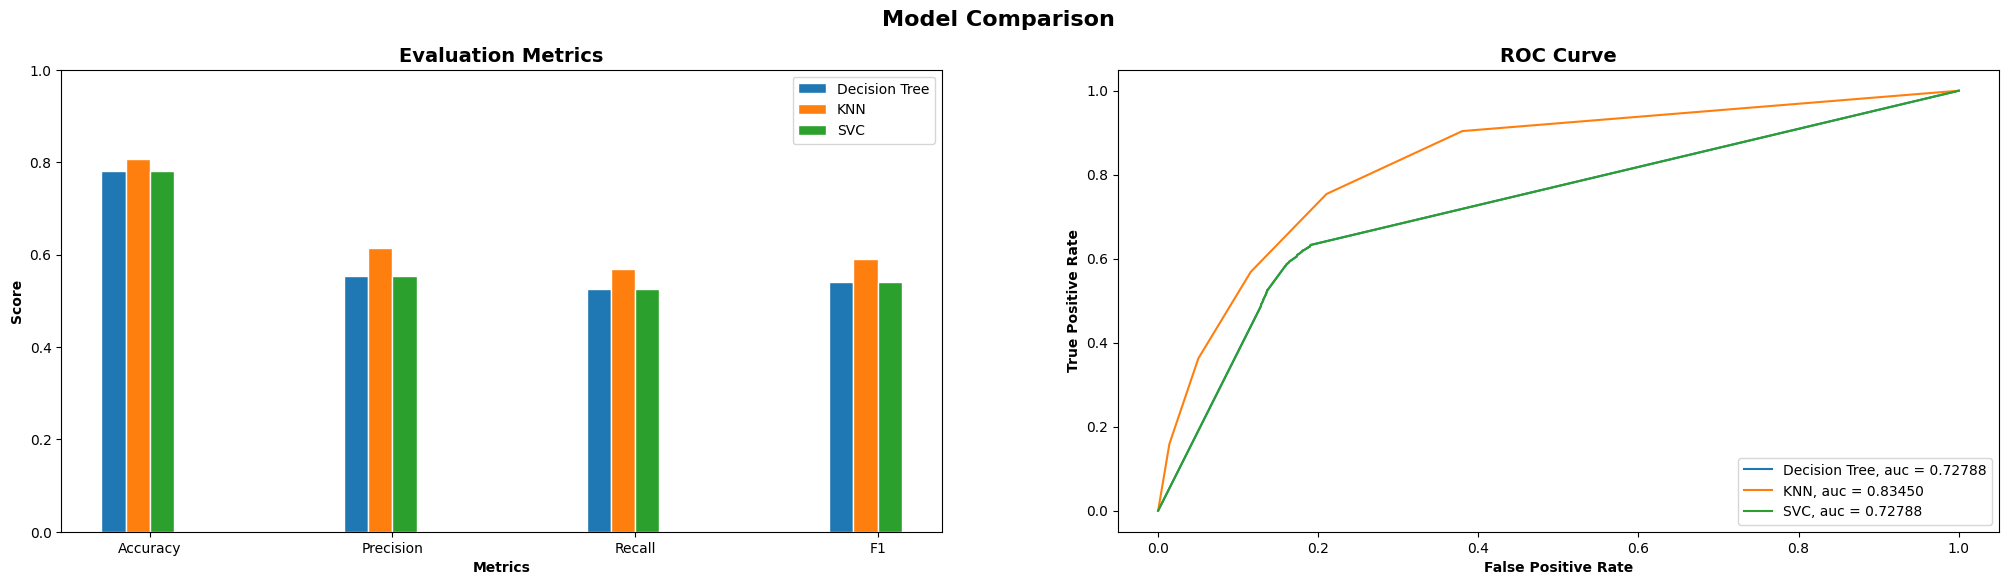

In [ ]:
#Model Comparison

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(25)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1

dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
svc_score = [svc_eval['acc'],svc_eval['prec'],svc_eval['rec'],svc_eval['f1']]



## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='KNN')
ax1.bar(r3, svc_score, width=barWidth, edgecolor='white', label='SVC')



## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='KNN, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label='SVC, auc = {:0.5f}'.format(svc_eval['auc']))
#ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))


## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)
plt.show()


<div dir="rtl">
همانطور که در نمودار میله ای بالا میبینید،
KNN
در هر 4 معیار بهترین عملکرد را داشته.
پس بین این 3 مدل،میتواند بهترین انتخاب باشد.

با توجه به AUC
میز میبینیم که بالاترین AUC
متعلق به
KNN
است.
پس با درنظرگرفتن این معیار نیز انتخاب ما
KNN
خواهد بود.
 </div>